<a href="https://colab.research.google.com/github/syedshubha/QNET25_Shubha/blob/main/DenseErrorCKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --quiet qiskit
%pip install --quiet qiskit-aer
%pip install --quiet pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
# Install the base latex packages
!sudo apt-get update > /dev/null
!sudo apt-get install --quiet texlive-latex-base > /dev/null
!sudo apt-get install --quiet texlive-latex-extra > /dev/null
# Create symbolic link
!sudo ln -s /usr/bin/pdftex /usr/bin/pdflatex
!sudo texhash > /dev/null
!apt-get install -qq poppler-utils > /dev/null

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 28.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 24.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)


In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Gate, Parameter

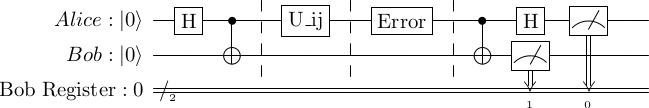

In [4]:
alice = QuantumRegister(1, name='Alice')
bob = QuantumRegister(1, name='Bob')
cr = ClassicalRegister(2, name= "Bob Register")
circuit = QuantumCircuit(alice, bob, cr)

# Create a custom gate
error = Gate(name='Error', num_qubits=1, params=[])
encode = Gate(name='U_{ij}', num_qubits=1, params=[])

circuit.h(0)
circuit.cx(0, 1)

circuit.barrier()

circuit.append(encode,[0])
circuit.barrier()



circuit.append(error, [0])

circuit.barrier()

# Decode the message (Step 3)
circuit.cx(0,1)  # Apply CNOT gate
circuit.h(0)  # Apply Hadamard gate

# Measure the qubits
circuit.measure([0, 1],[0,1])

circuit.draw(output="latex", initial_state=True)

In [5]:
latex_source = circuit.draw(output="latex_source", initial_state=True)
print(latex_source)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{Alice} : \ket{{0}} } & \lstick{{Alice} : \ket{{0}} } & \gate{\mathrm{H}} & \ctrl{1} \barrier[0em]{1} & \qw & \gate{\mathrm{U\_{ij}}} \barrier[0em]{1} & \qw & \gate{\mathrm{Error}} \barrier[0em]{1} & \qw & \ctrl{1} & \gate{\mathrm{H}} & \meter & \qw & \qw\\
	 	\nghost{{Bob} : \ket{{0}} } & \lstick{{Bob} : \ket{{0}} } & \qw & \targ & \qw & \qw & \qw & \qw & \qw & \targ & \meter & \qw & \qw & \qw\\
	 	\nghost{\mathrm{{Bob\;Register} : 0 }} & \lstick{\mathrm{{Bob\;Register} : 0 }} & \lstick{/_{_{2}}} \cw & \cw & \cw & \cw & \cw & \cw & \cw & \cw & \dstick{_{_{\hspace{0.0em}1}}} \cw \ar @{<=} [-1,0] & \dstick{_{_{\hspace{0.0em}0}}} \cw \ar @{<=} [-2,0] & \cw & \cw\\
\\ }}
\end{document}


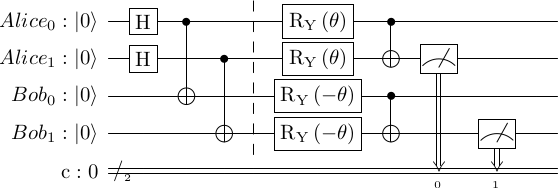

In [6]:
from numpy import pi
theta = Parameter('θ')

def dejmps_purification(theta):
    Alice = QuantumRegister(2, 'Alice')
    Bob = QuantumRegister(2, 'Bob')

    cr = ClassicalRegister(2, 'c')

    qc = QuantumCircuit(Alice, Bob, cr)

    qc.h(Alice[0])
    qc.cx(Alice[0], Bob[0])

    qc.h(Alice[1])
    qc.cx(Alice[1], Bob[1])

    qc.barrier()


    qc.ry(theta, Alice[0])
    qc.ry(-theta, Bob[0])
    qc.ry(theta, Alice[1])
    qc.ry(-theta, Bob[1])

    qc.cx(Alice[0], Alice[1])
    qc.cx(Bob[0], Bob[1])

    qc.measure(Alice[1], cr[0])
    qc.measure(Bob[1], cr[1])

    return qc



qc = dejmps_purification(theta)
qc.draw(output="latex", initial_state=True)

In [7]:
latex_source = qc.draw(output="latex_source", initial_state=True)
print(latex_source)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{Alice}_{0} : \ket{{0}} } & \lstick{{Alice}_{0} : \ket{{0}} } & \gate{\mathrm{H}} & \ctrl{2} & \qw \barrier[0em]{3} & \qw & \gate{\mathrm{R_Y}\,(\mathrm{{\ensuremath{\theta}}})} & \ctrl{1} & \qw & \qw & \qw & \qw\\
	 	\nghost{{Alice}_{1} : \ket{{0}} } & \lstick{{Alice}_{1} : \ket{{0}} } & \gate{\mathrm{H}} & \qw & \ctrl{2} & \qw & \gate{\mathrm{R_Y}\,(\mathrm{{\ensuremath{\theta}}})} & \targ & \meter & \qw & \qw & \qw\\
	 	\nghost{{Bob}_{0} : \ket{{0}} } & \lstick{{Bob}_{0} : \ket{{0}} } & \qw & \targ & \qw & \qw & \gate{\mathrm{R_Y}\,(\mathrm{-{\ensuremath{\theta}}})} & \ctrl{1} & \qw & \qw & \qw & \qw\\
	 	\nghost{{Bob}_{1} : \ket{{0}} } & \lstick{{Bob}_{1} : \ket{{0}} } & \qw & \qw & \targ & \qw & \gate{\mathrm{R_Y}\,(\mathrm{-{\ensuremath{\theta}}})} & \targ & \qw & \meter & \qw & \qw\\
	 	\nghost{\mathrm{{

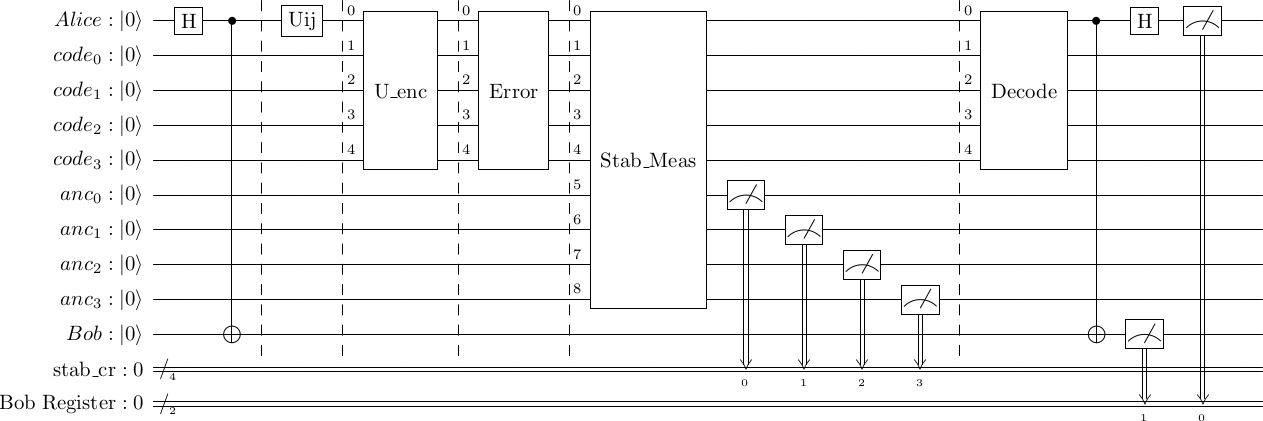

In [8]:
alice = QuantumRegister(1, name='Alice')
code = QuantumRegister(4, name='code')
anc  = QuantumRegister(4, name='anc')
stab_cr = ClassicalRegister(4, name='stab_cr')
bob = QuantumRegister(1, name='Bob')
cr = ClassicalRegister(2, name= "Bob Register")
QEC = QuantumCircuit(alice, code, anc, bob, stab_cr, cr)

# Create a custom gate
error = Gate(name='Error', num_qubits=5, params=[])
encode = Gate(name='Uij', num_qubits=1, params=[])
encode_gate = Gate(name='U_{enc}', num_qubits=5, params=[])
stab_gate   = Gate(name='Stab_Meas', num_qubits=9, params=[])  # 5 code qubits + 4 ancilla qubits
decode_gate = Gate(name='Decode', num_qubits=5, params=[])

QEC.h(0)
QEC.cx(0, 9)

QEC.barrier()

QEC.append(encode,[0])
QEC.barrier()

QEC.append(encode_gate, [0,1,2,3,4])
QEC.barrier()

QEC.append(error, [0,1,2,3,4])

QEC.barrier()

QEC.append(stab_gate, [0,1,2,3,4,5,6,7,8])
QEC.measure([5,6,7,8],[0,1,2,3])
QEC.barrier()

QEC.append(decode_gate, [0,1,2,3,4])

# Decode the message (Step 3)
QEC.cx(0,9)  # Apply CNOT gate
QEC.h(0)  # Apply Hadamard gate

# Measure the qubits
QEC.measure([0, 9],[4,5])

QEC.draw(output="latex", initial_state=True)

In [9]:
latex_source = QEC.draw(output="latex_source", initial_state=True)
print(latex_source)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{Alice} : \ket{{0}} } & \lstick{{Alice} : \ket{{0}} } & \gate{\mathrm{H}} & \ctrl{9} \barrier[0em]{9} & \qw & \gate{\mathrm{Uij}} \barrier[0em]{9} & \qw & \multigate{4}{\mathrm{U\_{enc}}}_<<<{0} \barrier[0em]{9} & \qw & \multigate{4}{\mathrm{Error}}_<<<{0} \barrier[0em]{9} & \qw & \multigate{8}{\mathrm{Stab\_Meas}}_<<<{0} & \qw & \qw & \qw & \qw \barrier[0em]{9} & \qw & \multigate{4}{\mathrm{Decode}}_<<<{0} & \ctrl{9} & \gate{\mathrm{H}} & \meter & \qw & \qw\\
	 	\nghost{{code}_{0} : \ket{{0}} } & \lstick{{code}_{0} : \ket{{0}} } & \qw & \qw & \qw & \qw & \qw & \ghost{\mathrm{U\_{enc}}}_<<<{1} & \qw & \ghost{\mathrm{Error}}_<<<{1} & \qw & \ghost{\mathrm{Stab\_Meas}}_<<<{1} & \qw & \qw & \qw & \qw & \qw & \ghost{\mathrm{Decode}}_<<<{1} & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{code}_{1} : \ket{{0}} } & \lstick

In [10]:
QEC.draw(output="latex_source", initial_state=True, filename='circuit.tex')

'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{Alice} : \\ket{{0}} } & \\lstick{{Alice} : \\ket{{0}} } & \\gate{\\mathrm{H}} & \\ctrl{9} \\barrier[0em]{9} & \\qw & \\gate{\\mathrm{Uij}} \\barrier[0em]{9} & \\qw & \\multigate{4}{\\mathrm{U\\_{enc}}}_<<<{0} \\barrier[0em]{9} & \\qw & \\multigate{4}{\\mathrm{Error}}_<<<{0} \\barrier[0em]{9} & \\qw & \\multigate{8}{\\mathrm{Stab\\_Meas}}_<<<{0} & \\qw & \\qw & \\qw & \\qw \\barrier[0em]{9} & \\qw & \\multigate{4}{\\mathrm{Decode}}_<<<{0} & \\ctrl{9} & \\gate{\\mathrm{H}} & \\meter & \\qw & \\qw\\\\\n\t \t\\nghost{{code}_{0} : \\ket{{0}} } & \\lstick{{code}_{0} : \\ket{{0}} } & \\qw & \\qw & \\qw & \\qw & \\qw & \\ghost{\\mathrm{U\\_{enc}}}_<<<{1} & \\qw & \\ghost{\\mathrm{Error}}_<<<{1} & \\qw & \\ghost{\\mathrm{Stab\\_Meas}}_<<<{1} & \\qw & \\qw & \\qw & \\qw & \\qw & \\ghost{\\mathrm{Deco

In [11]:
!pdflatex -shell-escape circuit.tex && pdftoppm -svg circuit.pdf > circuit.svg

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=pdflatex)
 \write18 enabled.
entering extended mode
(./circuit.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cls
Document Class: standalone 2018/03/26 v1.3a Class to compile TeX sub-files stan
dalone
(/usr/share/texlive/texmf-dist/tex/latex/tools/shellesc.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifluatex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex
(/usr/share/texlive/texmf-dist/tex/generic/xkeyval/keyval.tex))))
(/usr/share/texlive/texmf-dist/tex/latex/standalone/standalone.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaT

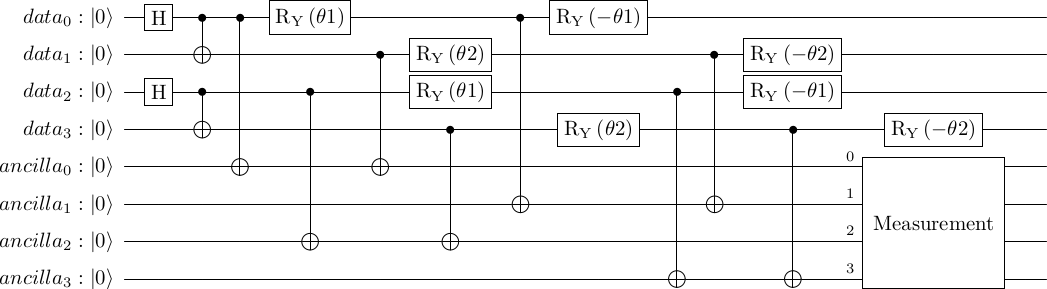

In [14]:
data = QuantumRegister(4, 'data')       # 4 data qubits for two entangled pairs
ancilla = QuantumRegister(4, 'ancilla') # 4 ancilla qubits for error detection
qc = QuantumCircuit(data, ancilla)

meas = Gate(name='Measurement', num_qubits=4, params=[])

# Initialize two entangled pairs (Bell states)
qc.h(data[0])
qc.cx(data[0], data[1])  # First pair: qubits 0 and 1
qc.h(data[2])
qc.cx(data[2], data[3])  # Second pair: qubits 2 and 3

# Define parameterized angles for each pair
theta1 = Parameter('θ1')  # For first pair (data[0], data[1])
theta2 = Parameter('θ2')  # For second pair (data[2], data[3])

# Amplitude error detection
qc.cx(data[0], ancilla[0])
qc.cx(data[1], ancilla[0])
qc.cx(data[2], ancilla[2])
qc.cx(data[3], ancilla[2])

# Phase error detection with parameterized rotations
# First entangled pair: Use theta1
qc.ry(theta1, data[0])
qc.ry(theta2, data[1])
qc.cx(data[0], ancilla[1])
qc.cx(data[1], ancilla[1])
qc.ry(-theta1, data[0])  # Reverse rotation
qc.ry(-theta2, data[1])  # Reverse rotation

# Second entangled pair: Use theta2
qc.ry(theta1, data[2])
qc.ry(theta2, data[3])
qc.cx(data[2], ancilla[3])
qc.cx(data[3], ancilla[3])
qc.ry(-theta1, data[2])  # Reverse rotation
qc.ry(-theta2, data[3])  # Reverse rotation

# Measure ancilla qubits
qc.append(meas, ancilla)

qc.draw(output="latex", initial_state=True)

In [15]:
latex_source = qc.draw(output="latex_source", initial_state=True)
print(latex_source)

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{data}_{0} : \ket{{0}} } & \lstick{{data}_{0} : \ket{{0}} } & \gate{\mathrm{H}} & \ctrl{1} & \ctrl{4} & \gate{\mathrm{R_Y}\,(\mathrm{{\ensuremath{\theta}}1})} & \qw & \qw & \ctrl{5} & \gate{\mathrm{R_Y}\,(\mathrm{-{\ensuremath{\theta}}1})} & \qw & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{data}_{1} : \ket{{0}} } & \lstick{{data}_{1} : \ket{{0}} } & \qw & \targ & \qw & \qw & \ctrl{3} & \gate{\mathrm{R_Y}\,(\mathrm{{\ensuremath{\theta}}2})} & \qw & \qw & \qw & \ctrl{4} & \gate{\mathrm{R_Y}\,(\mathrm{-{\ensuremath{\theta}}2})} & \qw & \qw & \qw\\
	 	\nghost{{data}_{2} : \ket{{0}} } & \lstick{{data}_{2} : \ket{{0}} } & \gate{\mathrm{H}} & \ctrl{1} & \qw & \ctrl{4} & \qw & \gate{\mathrm{R_Y}\,(\mathrm{{\ensuremath{\theta}}1})} & \qw & \qw & \ctrl{5} & \qw & \gate{\mathrm{R_Y}\,(\mathrm{-{\ensuremath{\theta}}1})} & \